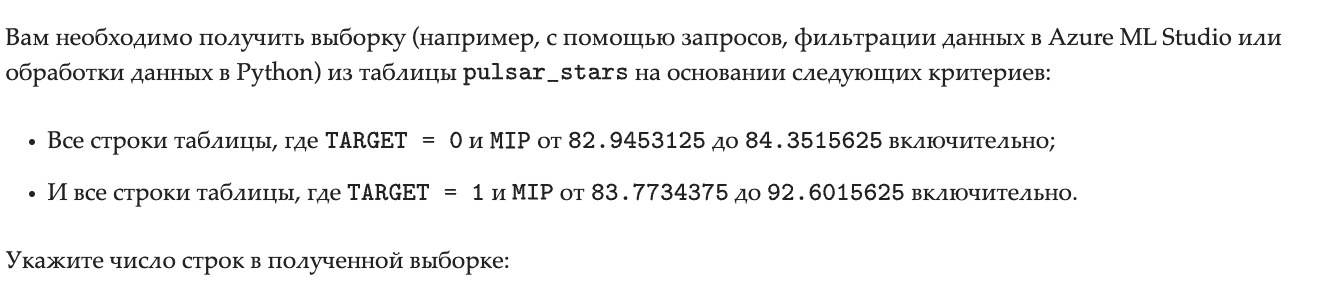

In [1]:
from IPython.display import display, Image
display(Image('./data/1.png'))

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/pulsar_stars.csv')
df.head()

,mip,stdip,ekip,sip,mc,stdc,ekc,sc,target
0,137.218750,45.390655,0.034985,0.134409,3.204013,17.177857,7.494588,74.003104,0
1,93.773438,41.883062,0.371402,1.291232,1.482441,12.959050,12.242911,180.158844,0
2,73.632812,35.461218,1.153607,4.161082,2.099498,13.057474,10.013591,140.894151,0
3,93.429688,39.883166,0.602060,1.518548,2.475753,14.146578,8.770640,107.970173,0
4,131.625000,44.111896,0.108905,0.239879,33.888796,70.398342,1.689460,1.031847,0


In [3]:
first = (df.query('target == 0')
  .query('82.9453125 <= mip')
  .query('mip <= 84.3515625'))

In [4]:
second = (df.query('target == 1')
  .query('83.7734375 <= mip')
  .query('mip <= 92.6015625'))

In [5]:
final_frame = first.append(second)
final_frame.shape[0]

202

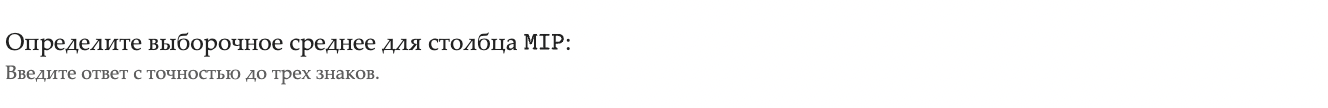

In [2]:
from IPython.display import display, Image
display(Image('./data/2.png'))

In [6]:
final_frame['mip'].mean()

85.78925587871286

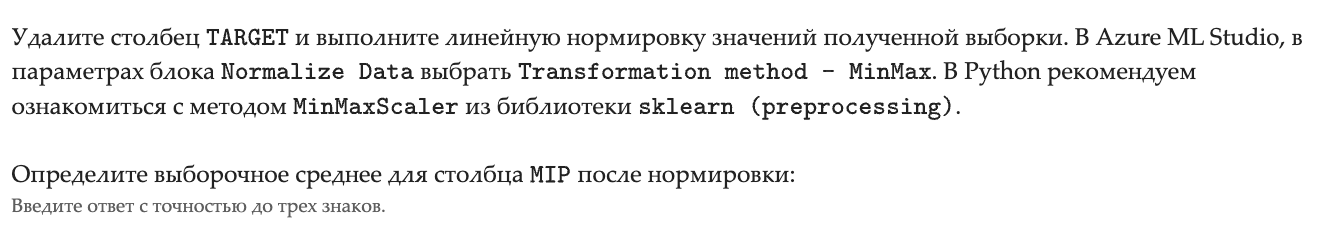

In [3]:
from IPython.display import display, Image
display(Image('./data/3.png'))

In [7]:
from sklearn import preprocessing

In [8]:
df_norm = final_frame.drop('target', axis = 1)
names = df_norm.columns
df_norm.head()

,mip,stdip,ekip,sip,mc,stdc,ekc,sc
280,83.679688,36.379281,0.572532,2.664611,4.040970,23.169129,7.006681,53.514005
342,84.039062,38.943951,0.668007,1.586058,1.793478,13.494579,11.433532,161.907833
385,84.273438,38.399975,0.662579,1.778425,2.984114,16.690291,8.407608,86.913036
406,83.968750,32.786939,0.972955,4.940515,1.638796,11.934603,12.157317,199.321879
445,83.531250,42.521674,0.581761,1.230803,3.428094,17.796434,7.050442,61.662594


In [9]:
scaler = preprocessing.MinMaxScaler()

In [10]:
normalized = scaler.fit_transform(df_norm)

In [11]:
scaled_df = pd.DataFrame(normalized, columns=names)

In [12]:
scaled_df.head()

,mip,stdip,ekip,sip,mc,stdc,ekc,sc
0,0.076052,0.106541,0.108946,0.270927,0.022596,0.152646,0.327457,0.089913
1,0.113269,0.166718,0.150221,0.190422,0.008328,0.049772,0.510031,0.265987
2,0.137540,0.153954,0.147875,0.204781,0.015887,0.083754,0.385235,0.144166
3,0.105987,0.022251,0.282054,0.440805,0.007346,0.033184,0.539882,0.326763
4,0.060680,0.250665,0.112936,0.163905,0.018706,0.095516,0.329261,0.103149


In [13]:
scaled_df['mip'].mean()

0.2945184081514949

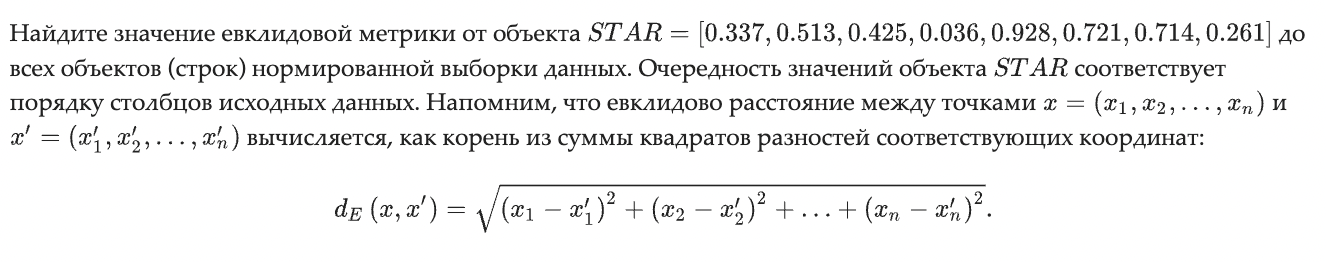

In [4]:
from IPython.display import display, Image
display(Image('./data/4.png'))

In [14]:
import math

In [15]:
star = [0.337, 0.513, 0.425, 0.036,
        0.928, 0.721, 0.714, 0.261]

In [16]:
min_dist = 1e9
total_data = scaled_df.values
i = 0
while i < len(total_data):
    current_dist = 0
    for j in range(8):
        current_dist += (total_data[i][j] - star[j]) ** 2
    min_dist = min(min_dist, math.sqrt(current_dist))
    i += 1
min_dist

0.7828460858809095